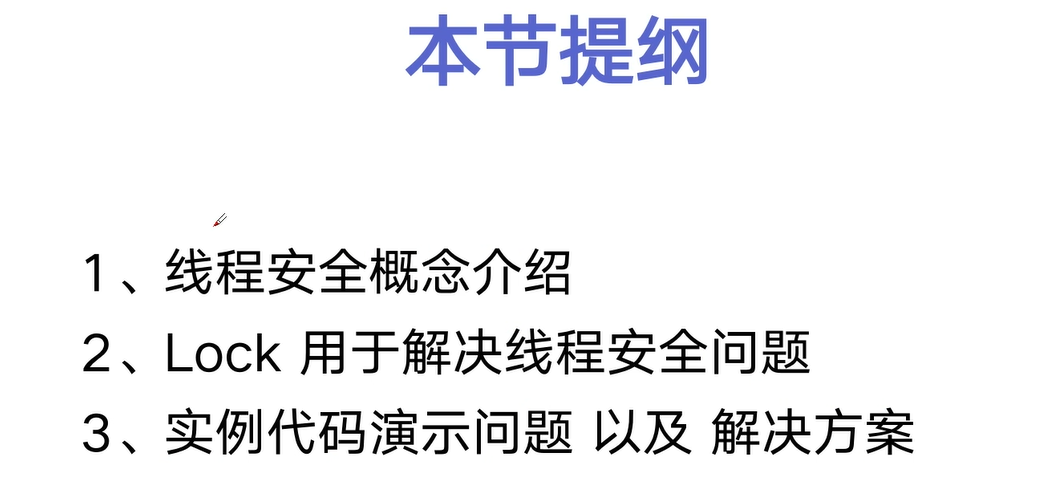

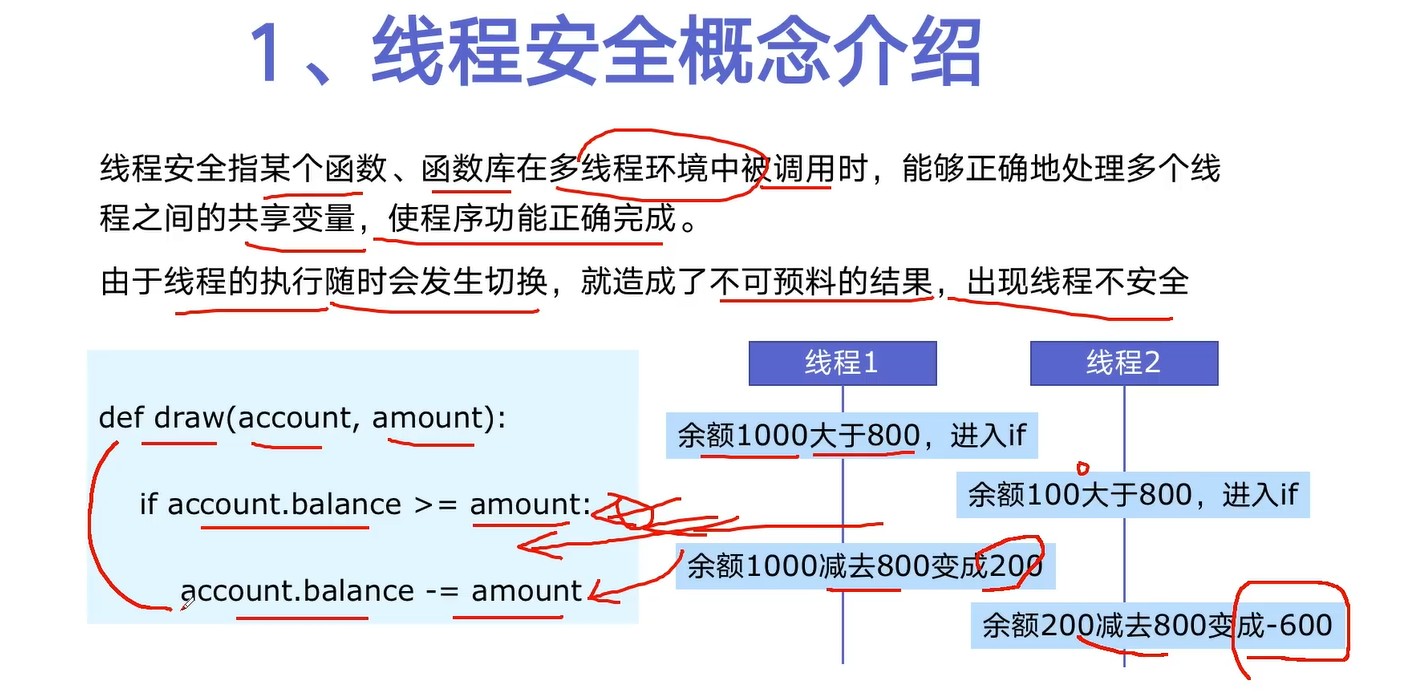

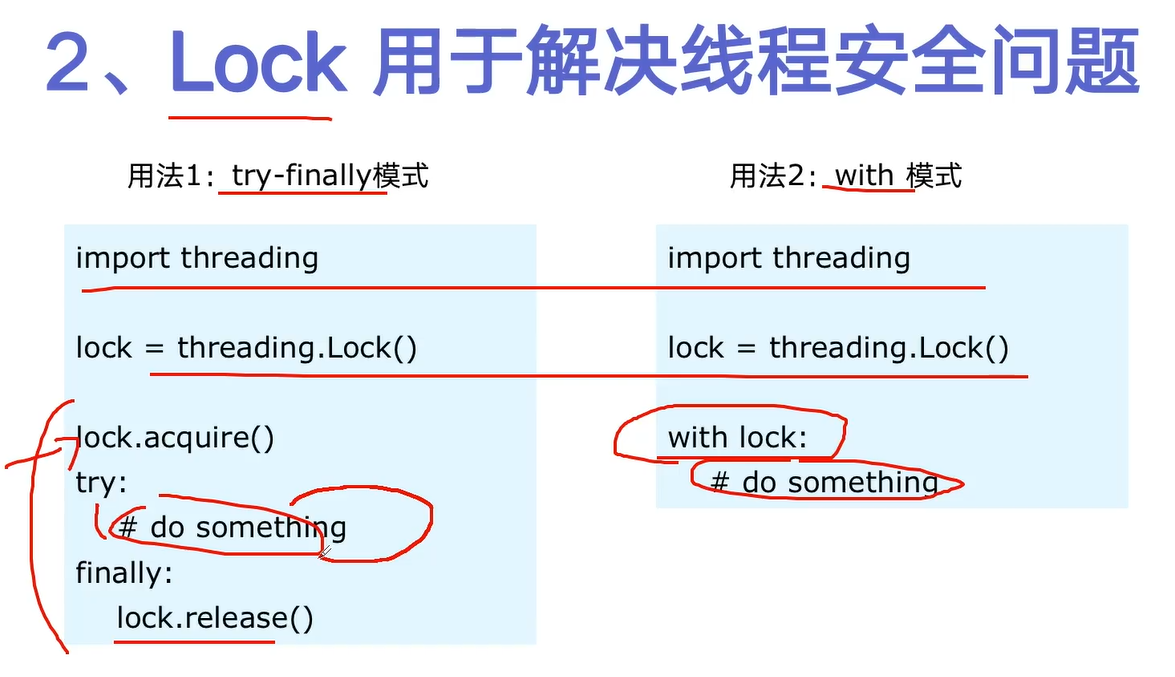

# 代码：

In [3]:
import threading
import time

lock = threading.Lock()

class Account:
    def __init__(self, balance):
        self.balance = balance


def draw(account, amount):
    with lock: # 把可能出现问题的代码，放在with lock下面就可以了
        if account.balance >= amount:
            time.sleep(0.1)
            print(threading.current_thread().name,
                  "取钱成功")
            account.balance -= amount
            print(threading.current_thread().name,
                  "余额", account.balance)
        else:
            print(threading.current_thread().name,
                  "取钱失败，余额不足")


if __name__ == "__main__":
    account = Account(1000)
    ta = threading.Thread(name="ta", target=draw, args=(account, 800))
    tb = threading.Thread(name="tb", target=draw, args=(account, 800))

    ta.start()
    tb.start()

ta 取钱成功
ta 余额 200
tb 取钱失败，余额不足
